# Heart Disease Prediction
We will use following data set from kaggle: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Logistic Regression
As an excercise I will use a logistic regression model.

Logistic Regression is a supervised machine learning algorithm that is used for binary classification tasks. Despite its name, logistic regression is primarily used for classification, not regression.

Logistic Regression is designed to predict the probability that an instance belongs to a particular class. It's particularly useful when the dependent variable is binary, meaning it has only two possible outcomes. Heart prediction is a suitable task for logistic regression.

Logistic Regression uses the logistic function (also called the sigmoid function) to model the probability of the binary outcome.  
  
The logistic function *S(z)* is defined as:  
$$
S(z) = \frac{1}{1 + e^{-z}}  
$$  
  
  where 'z' is a linear combination of input features.

In [1]:
import os                                                                                  # Operating System module for working with file paths
import pickle                                                                              # Module for serializing and deserializing Python objects
import pandas as pd                                                                        # Data manipulation library, often used for working with tabular data
import numpy as np                                                                         # Numerical computing library for handling arrays and mathematical operations
import matplotlib.pyplot as plt                                                            # Plotting library for creating visualizations
import seaborn as sns                                                                      # Data visualization library based on Matplotlib, provides additional styling
import sklearn.impute as SimpleImputer                                                     # Module for handling missing data using imputation methods
from sklearn.model_selection import train_test_split                                       # Function for splitting datasets into training and testing sets
from sklearn.linear_model import LogisticRegression                                        # Logistic Regression model for classification tasks
from sklearn.preprocessing import StandardScaler                                           # Feature scaling to normalize or standardize data
from sklearn.dummy import DummyClassifier                                                  # Dummy classifier for creating baseline models
from sklearn.pipeline import make_pipeline                                                 # Utility for creating machine learning pipelines
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score  # Evaluation metrics and tools

In [2]:
relative_path = 'Heart disease prediction (input).csv'
file_path = os.path.join(os.getcwd(), relative_path)
df = pd.read_csv(file_path)

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data cleaning & preprocessing

In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.isna().sum().sort_values(ascending = False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
prevalentHyp         0
prevalentStroke      0
age                  0
currentSmoker        0
diaBP                0
sysBP                0
diabetes             0
TenYearCHD           0
dtype: int64

In [8]:
list_of_col_with_missing = []

for n in df.columns:
    if df[n].isna().sum():
        list_of_col_with_missing.append(n)

print(list_of_col_with_missing)

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [9]:
for n in list_of_col_with_missing:
    df[n] = df[n].fillna(df[n].mean())

df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## EDA (Exploratory Data Analysis)

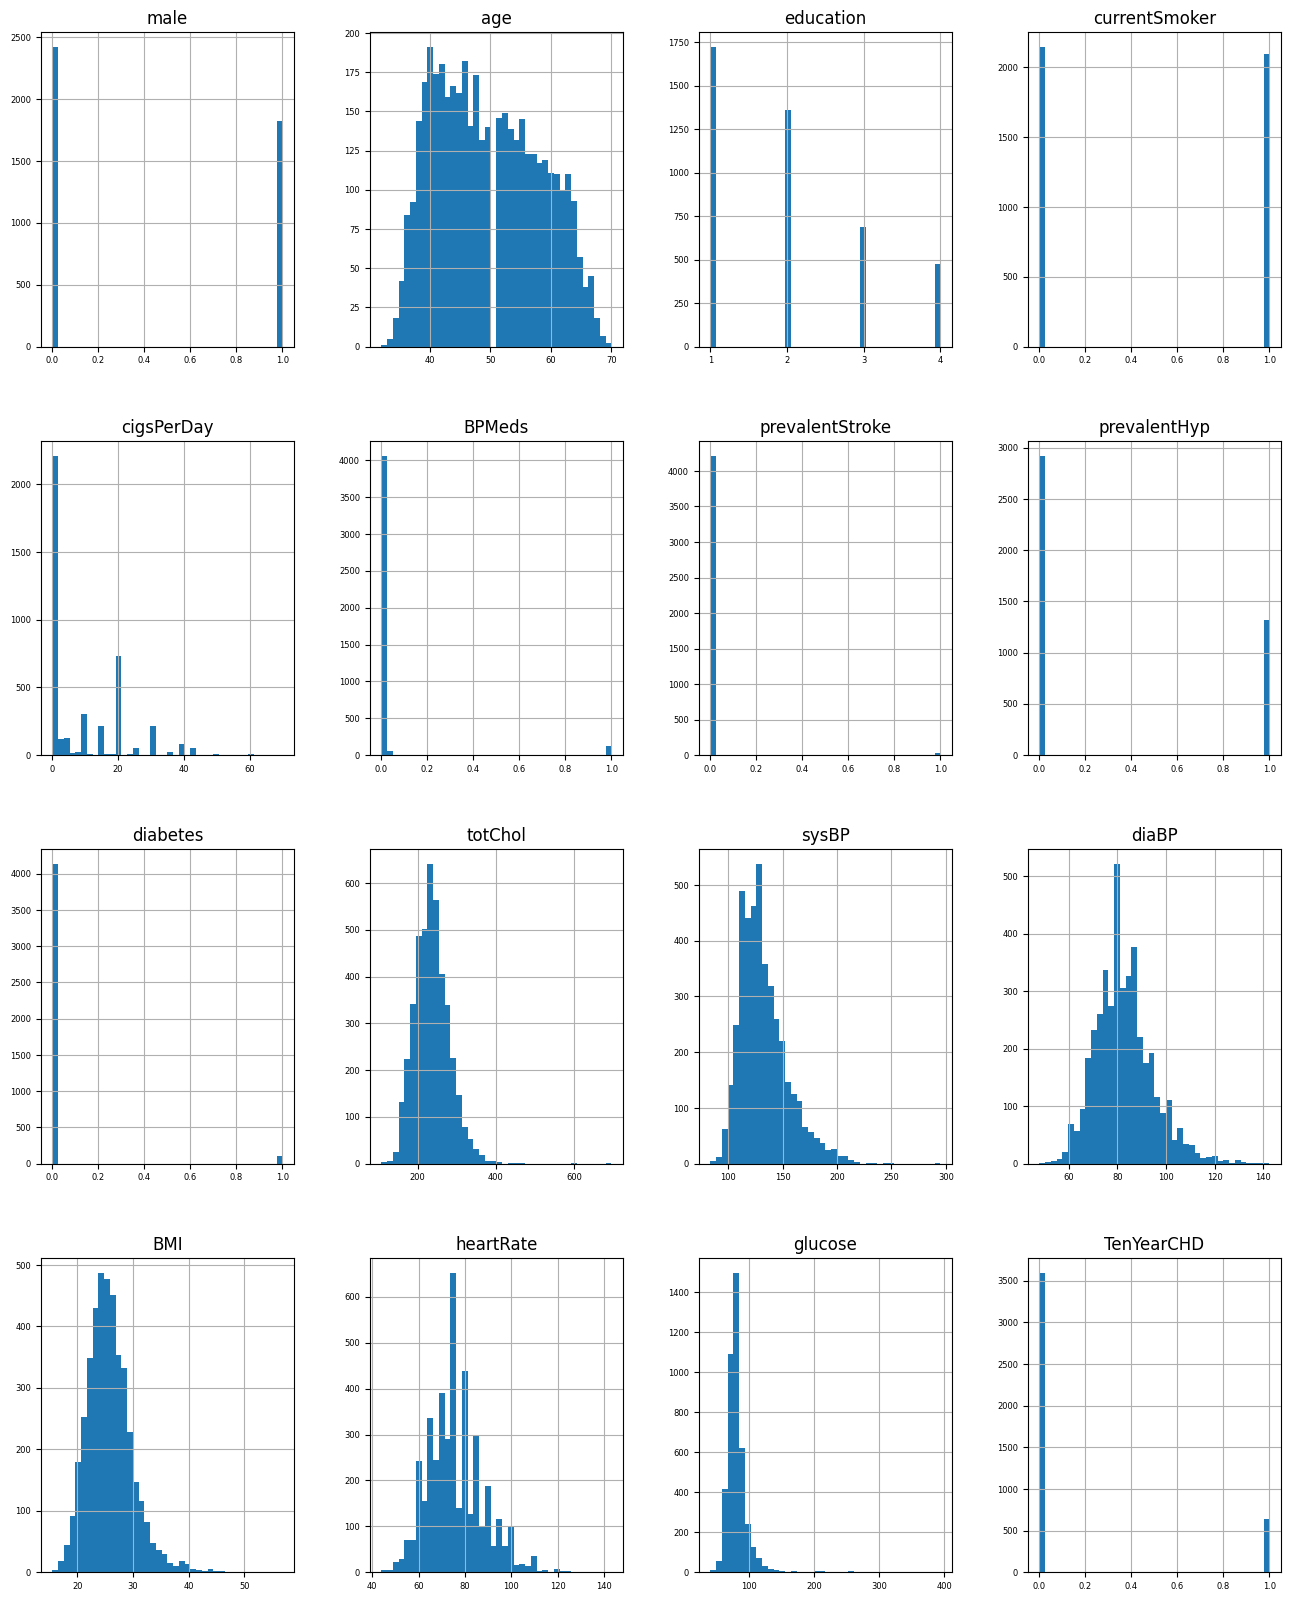

In [16]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

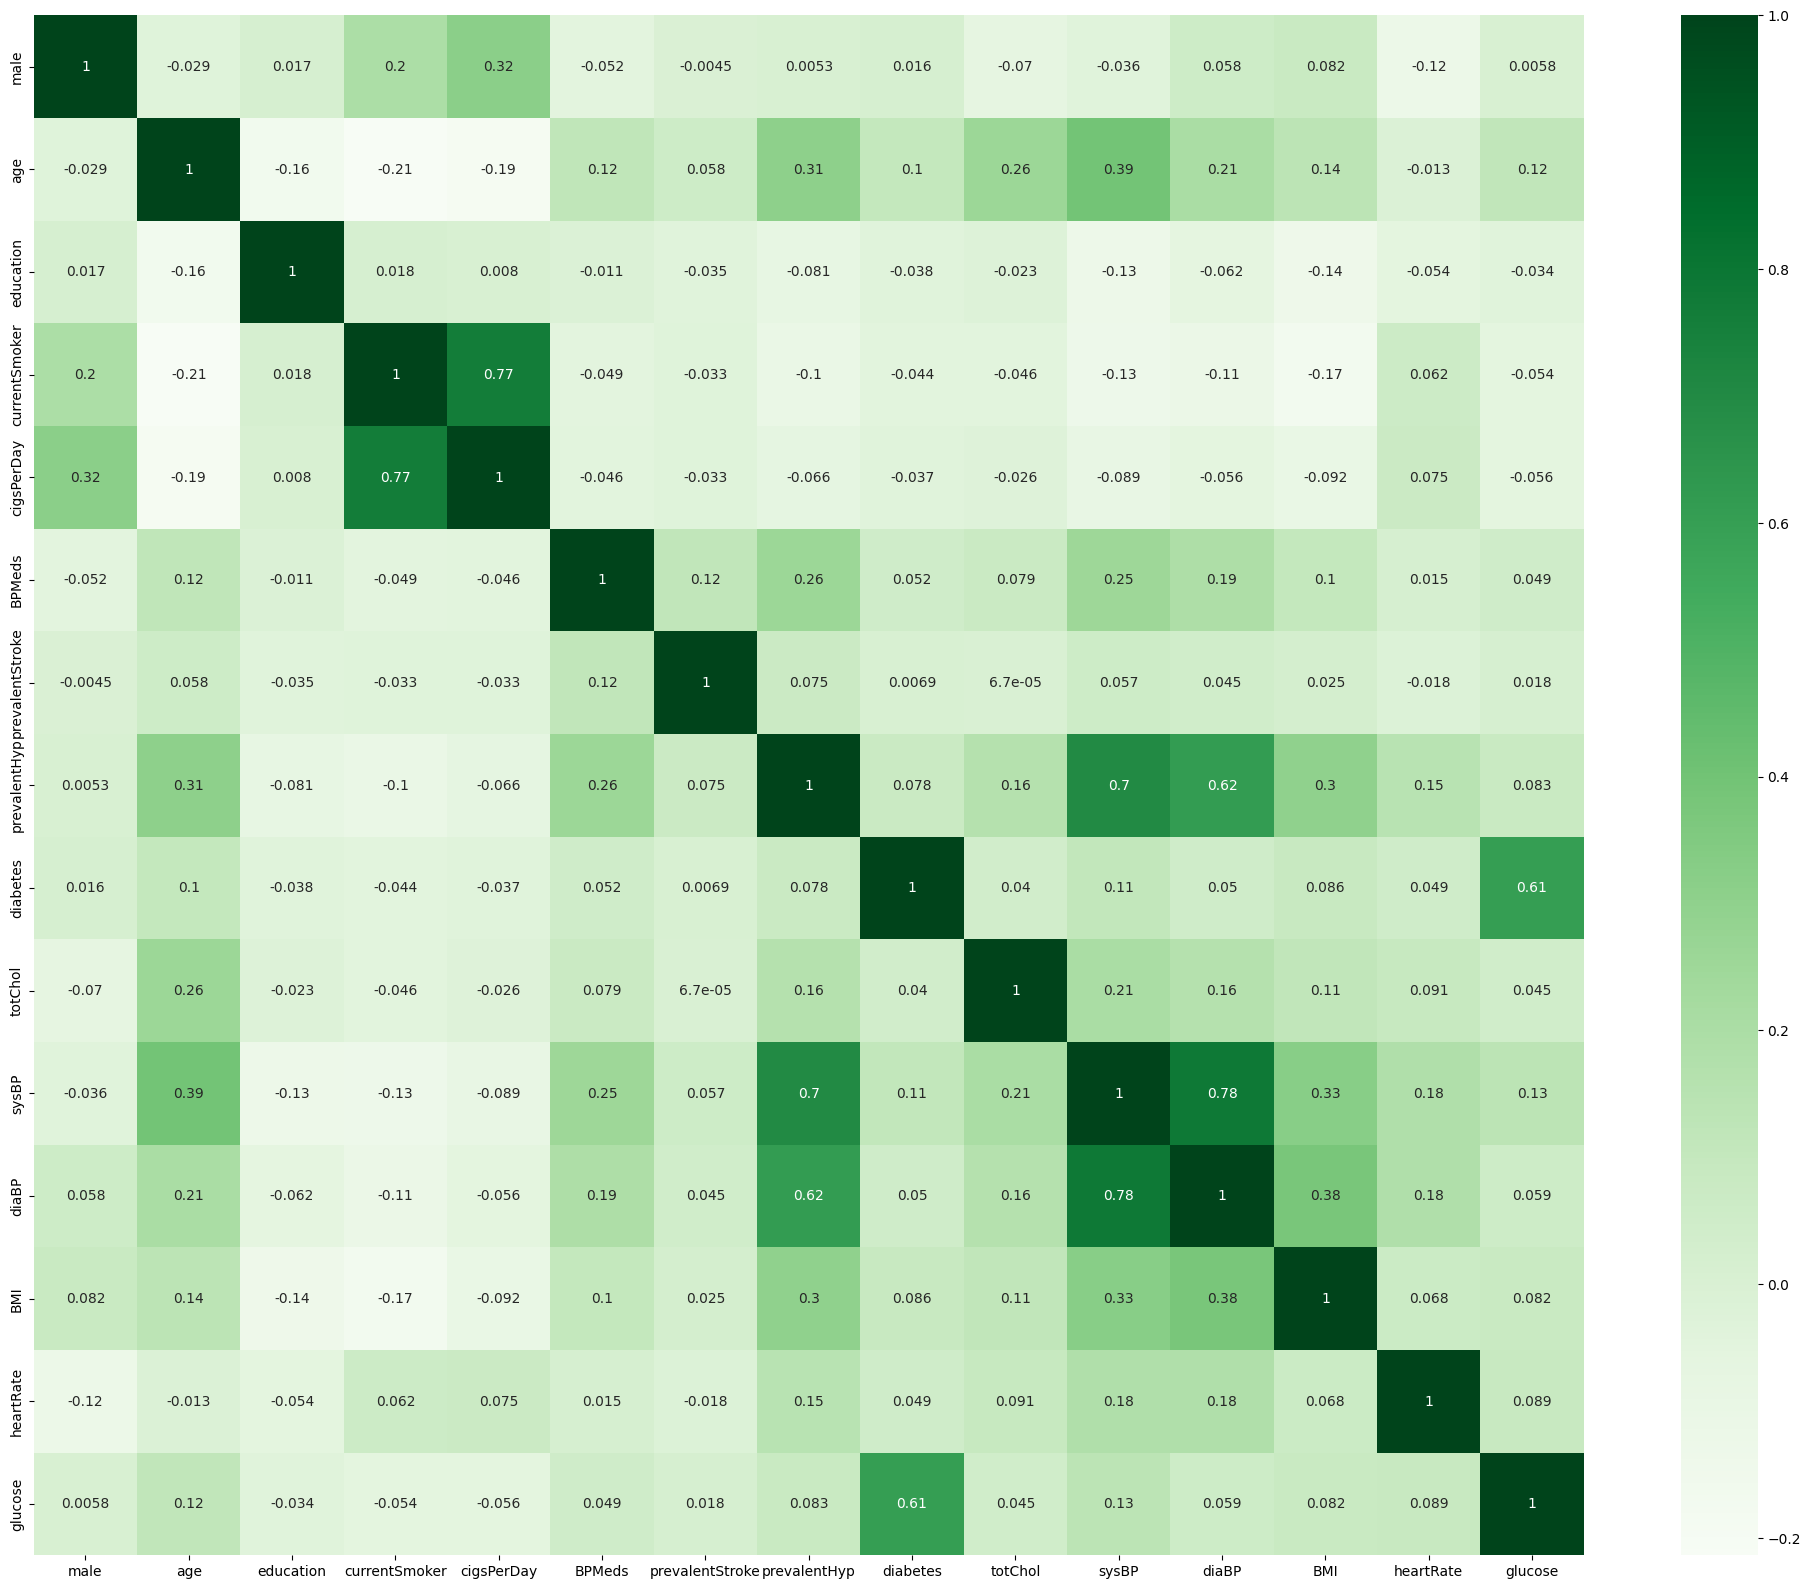

In [15]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

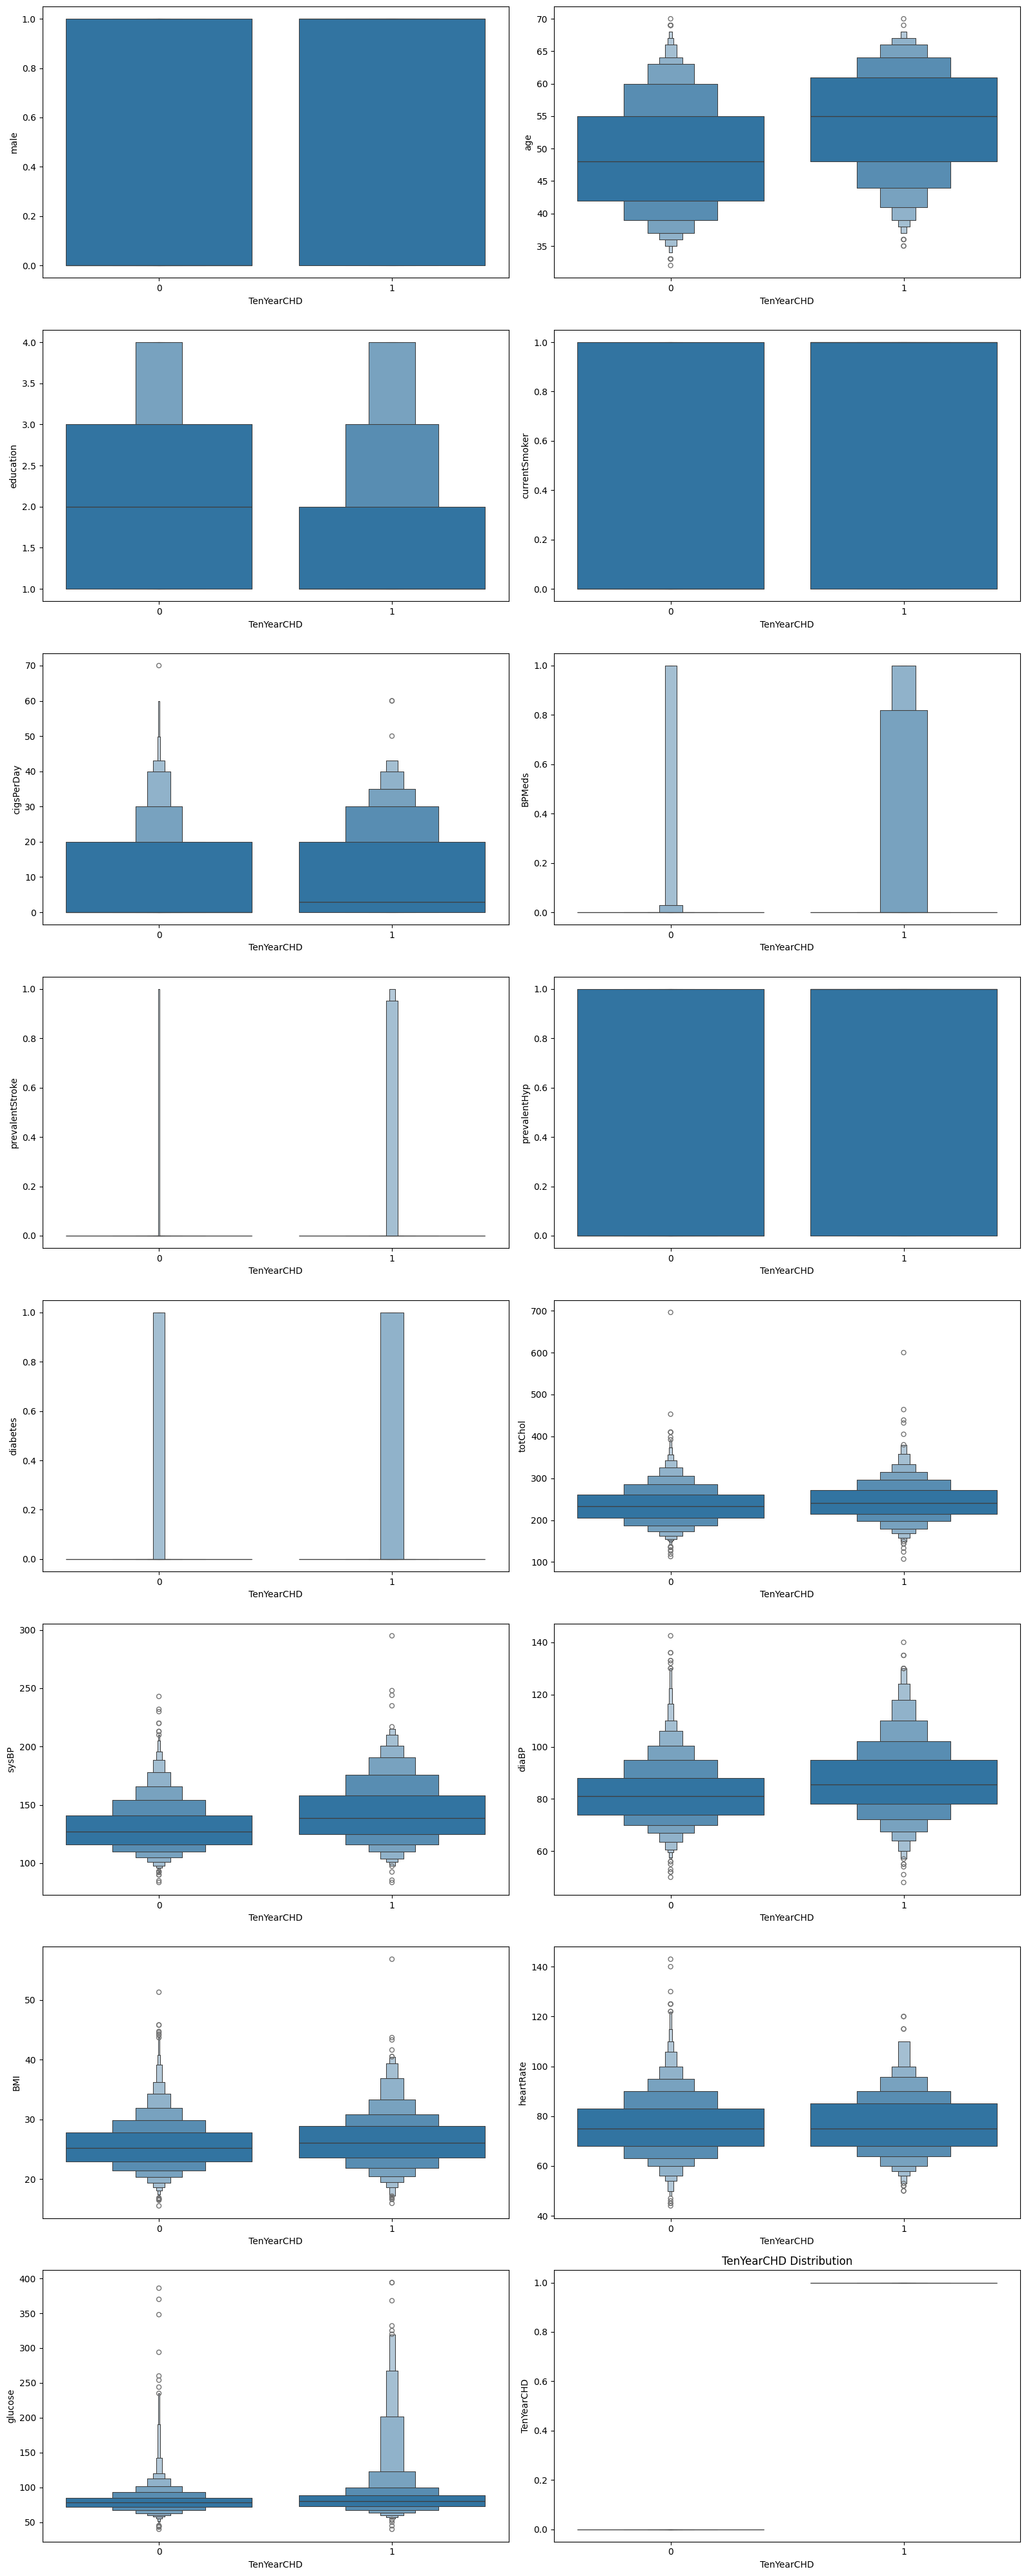

In [17]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=df, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout();

# Split data

In [10]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
acc_score_value = accuracy_score(y_test, y_pred)
conf_matrix_value = confusion_matrix(y_test, y_pred)
class_report_value = classification_report(y_test, y_pred)

print(f'Accuracy score: {acc_score_value}\nConfusion matrix:\n{conf_matrix_value}\nClassification report:\n{class_report_value}')

Accuracy score: 0.8561320754716981
Confusion matrix:
[[717   7]
 [115   9]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.56      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.71      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

